<a href="https://colab.research.google.com/github/bomiiisong/DeepLearning-with-Python/blob/master/SimpleRNN_Practice_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SimpleRNN Test Code

In [ ]:
import warnings
warnings.filterwarnings('ignore')

> ## Import Package

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

> ## I. SimpleRNN - without Normalization

> ### 1) Sample Data

* Input 데이터 생성(100, 5, 1)

In [ ]:
X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

* Output 데이터 생성(100, 5, 1)

In [ ]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ### 2) numpy_Array Casting

In [ ]:
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X.shape, y.shape

((100, 5, 1), (100,))

> ### 3) Tran vs. Test Split

* 80 : 20 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 5, 1), (20, 5, 1), (80,), (20,))

> ### 4) Keras SimpleRNN Modeling

#### (1) Model Define & Summary
* Unit(output_dim) : 3
* input_shape(input_lenght, input_dim) : (5, 1)
* return_sequences = False : 최종 Unit만 출력
* layers.Dense(1) : y_hat

In [ ]:
from keras import models, layers

model_1 = models.Sequential(name='SimpleRNN_1')
model_1.add(layers.SimpleRNN(3, input_shape=(5,1), return_sequences=False)) # RNN model 자체에 tanh 포함
model_1.add(layers.Dense(1))  # 예측모델이기 때문에 활성함수 X
model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


#### (2) Model Compile

In [ ]:
model_1.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])

#### (3) Model Fit

In [ ]:
Hist_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 42ms/step - loss: 3558.5349 - accuracy: 0.0000e+00 - val_loss: 3603.9785 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 3729.4047 - accuracy: 0.0000e+00 - val_loss: 3599.6477 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 3390.7493 - accuracy: 0.0000e+00 - val_loss: 3595.3945 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 3339.6082 - accuracy: 0.0000e+00 - val_loss: 3591.1257 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 3508.8693 - accuracy: 0.0000e+00 - val_loss: 3586.8328 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 3503.6624 - accuracy: 0.0000e+00 - val_loss: 3582.5913 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - lo

#### (4) Model Predict

In [ ]:
y_hat = model_1.predict(X_test)

#### (5) 학습 결과 시각화

* Loss 감소

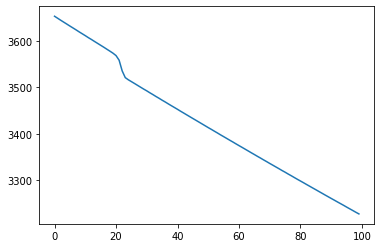

In [ ]:
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습되지 않음 (정확도 0)
    * 녹색 -> 정답(y_test)
    * 적색 -> 예측(y_hat)

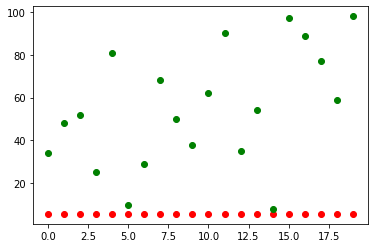

In [ ]:
plt.scatter(range(20), y_hat, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

## II. SimpleRNN - with Normalization

> ### 1) Sample Data - with Normalization

In [ ]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ### 2) Casting

In [ ]:
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X.shape, y.shape

((100, 5, 1), (100,))

> ### 3) Train vs. Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ### 4) Keras SimpleRNN Modeling

#### (1) Model Define & Summary

* None : input_length 자동 맞춤

In [ ]:
model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3, input_shape = (None, 1), return_sequences = False))

model_2.add(layers.Dense(1))
model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


#### (2) Model Compile

In [ ]:
model_2.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])

#### (3) Model Fit

In [ ]:
Hist_2 = model_2.fit(X_train, y_train, epochs = 100, batch_size = 8, 
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 0.0698 - accuracy: 0.0130 - val_loss: 0.0489 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0465 - accuracy: 0.0058 - val_loss: 0.0352 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0434 - accuracy: 0.0223 - val_loss: 0.0250 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0270 - accuracy: 0.0099 - val_loss: 0.0187 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0238 - accuracy: 0.0310 - val_loss: 0.0150 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0210 - accuracy: 0.0404 - val_loss: 0.0133 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0138 - accuracy: 0.0366 - val_loss: 0.0122 - val_accur

#### (4) Model Predict

In [ ]:
y_hat = model_2.predict(X_test)

#### (5) 학습 결과 시각화

* Loss 감소

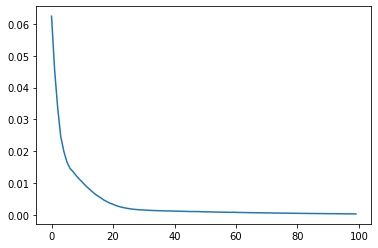

In [ ]:
plt.plot(Hist_2.history['loss'])
plt.show()

* 학습 진행
    * 녹색 -> 정답(y_test)
    * 적색 -> 예측(y_hat)

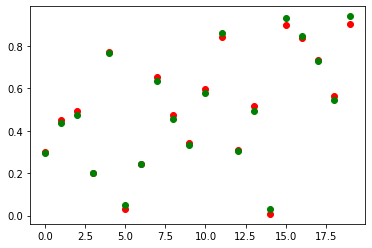

In [ ]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

## III. Stacked_SimpleRNN

> ### 1) Model Define & Summary
* return_sequences = True

In [ ]:
model_4 = models.Sequential(name='Stacked_RNN')
model_4.add(layers.SimpleRNN(3, input_shape=(None, 1),
                             return_sequences=True)) # Stacked RNN model에서 반드시 True 로
                             
model_4.add(layers.SimpleRNN(3, input_shape=(None, 1),
                             return_sequences=False))
model_4.add(layers.Dense(1))
model_4.summary()

Model: "Stacked_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


> ### 2) Model Compile

In [ ]:
model_4.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])

> ### 3) Model Fit

In [ ]:
Hist_4 = model_4.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 46ms/step - loss: 1.1742 - accuracy: 0.0136 - val_loss: 0.8304 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7560 - accuracy: 0.0136 - val_loss: 0.5564 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4932 - accuracy: 0.0107 - val_loss: 0.3671 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.3141 - accuracy: 0.0344 - val_loss: 0.2480 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2221 - accuracy: 0.0066 - val_loss: 0.1745 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1637 - accuracy: 0.0050 - val_loss: 0.1301 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1319 - accuracy: 0.0344 - val_loss: 0.1023 - val_acc

> ### 4) Model Predict

In [ ]:
y_hat = model_4.predict(X_test)

> ### 5) 학습 결과 시각화

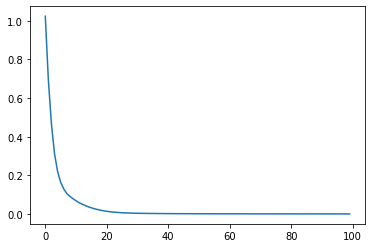

In [ ]:
plt.plot(Hist_4.history['loss'])
plt.show()

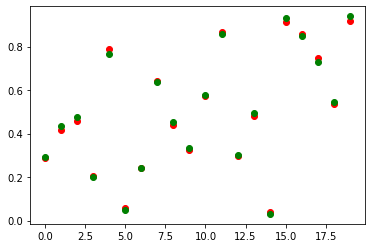

In [ ]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

## IV. 'return_sequences' Output_Options
* 'input_length'에 대한 Sequance 전체를 출력할지 설정
    * 'False' vs. 'True'

> ### 1) 실습데이터 재생성

In [ ]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ### 2) 테스트용 Input Data

In [ ]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

> ### 3) False_Option
* 마지막 Output만 출력
     * Unit : 1

In [ ]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1, input_shape=(5,1),
                                 return_sequences=False)) # False 인 경우 : Output 1개
Model_False.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])

In [ ]:
Model_False.predict(X_test[0].reshape(1, 5, 1)) # 최종 Output 만 출력

array([[1.]], dtype=float32)

* False (최종 Output 만 출력)
    * Unit : 3

In [ ]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3, input_shape=(5,1),
                                 return_sequences=False))
Model_False.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])

In [ ]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[-1., -1.,  1.]], dtype=float32)

> ### 4) True_Option

* 매 순환마다 Output 출력
    * Unit : 1
    * input_length : 5

In [ ]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1, input_shape=(5,1),
                                 return_sequences=True)) # True 인 경우 : Output 5개 (one to many 형태)
Model_True.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])

In [ ]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]], dtype=float32)

* 매 순환마다 Output 출력
    * Unit : 3
    * input_length : 5

In [ ]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3, input_shape=(5,1),
                                 return_sequences=True))
Model_True.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])

In [ ]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)